In [11]:
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
def print_stats(data, metric, phenotypes):
    print()
    print(f"Metric {metric}")
    for pt in phenotypes:
        print(pt)
        print(f"    mean: {round(data[f'{pt}_{metric}'].mean(), 4)}")
        print(f"    var: {round(data[f'{pt}_{metric}'].var(), 4)}")
        print(f"    std: {round(data[f'{pt}_{metric}'].std(), 4)}")
    print()
    
def detected_outliers(data, phenotype, metric, margin):
    t = data[data[f"{phenotype}_{metric}"] > margin]
    
    files = t["filename"].tolist()
    values = t[f"{phenotype}_{metric}"].tolist()
    
    print(f"Nro. Files: {len(files)}")
    for v in zip(files, values):
        print(f"{v[0]} | {v[1]}")

def plot_boxplot_metric(data, phenotype, metric):
    data_plot = {}

    for pt in phenotypes:
        p = pt.split("-")[1]
        if p == phenotype:
            data_plot[pt] = data[f"{pt}_{metric}"]

    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20) 

    # plt.figure(figsize=(2, 10))
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.boxplot(data_plot.values())
    ax.set_title(f'Error absoluto medio (MAE)', fontsize=20)
    plt.xticks([1, 2, 3], ['SM300', 'SM60', 'Ratio'])
    ax.set_xlabel(f'{phenotype}', fontsize=20)
    ax.set_ylabel('Error', fontsize=20)
    #ax.set_xticklabels(data_plot.keys())

In [13]:
EXP_NUM = 4
TOP_N_FEATURE = 10

phenotypes = [
    "SM300-Efficiency", "SM300-Rate", "SM300-Lag", "SM300-AUC",
    "SM60-Efficiency",  "SM60-Rate",  "SM60-Lag",  "SM60-AUC",
    "Ratio-Efficiency", "Ratio-Rate", "Ratio-Lag", "Ratio-AUC",
]


files_data_df = pd.read_csv(f"/home/khaldrem/code/sc_regmod/dataset/models/exp_{EXP_NUM}_file_data.csv")
data_scoring_metrics = pd.read_csv(f'/home/khaldrem/code/sc_regmod/dataset/models/filter/{EXP_NUM}/csv/scoring_metrics_overall.csv')

In [14]:
print(f"Archivos que quedan fuera: {files_data_df.loc[files_data_df['data_length'] <= TOP_N_FEATURE].shape[0]}")
print(f"Litado: {files_data_df.loc[files_data_df['data_length'] <= TOP_N_FEATURE]['filename'].tolist()}")

Archivos que quedan fuera: 1148
Litado: ['YDR241W', 'YKL041W', 'YNR077C', 'YDR156W', 'YLR038C', 'YDR441C', 'YCR031C', 'YJL119C', 'YBR009C', 'YGL079W', 'YDL016C', 'YIL065C', 'YLR365W', 'YDR056C', 'YCR040W', 'YLR178C', 'YGR076C', 'YGR039W', 'YER183C', 'YLR428C', 'YPL211W', 'YMR184W', 'YGL182C', 'YIR038C', 'YKL058W', 'YLR078C', 'YDR447C', 'YAL025C', 'YGR181W', 'YLR400W', 'YBL041W', 'YNL320W', 'YDR008C', 'YGL147C', 'YNL198C', 'YKL224C', 'YOR327C', 'YLR229C', 'YBR174C', 'YML089C', 'YLR209C', 'YLR110C', 'YNL170W', 'YJL075C', 'YPR014C', 'YKR035C', 'YBR118W', 'YOR185C', 'YDR382W', 'YPL188W', 'YPL114W', 'YLR297W', 'YNL043C', 'YDL157C', 'YDR139C', 'YPL087W', 'YGL242C', 'YDR154C', 'YOR387C', 'YLR109W', 'YPL107W', 'YEL073C', 'YLR244C', 'YBL077W', 'YJL143W', 'YPL047W', 'YNL122C', 'YER009W', 'YLR358C', 'YPL044C', 'YLR298C', 'YMR121C', 'YJL086C', 'YML077W', 'YOR376W', 'YPL080C', 'YER079W', 'YOR369C', 'YPR050C', 'YMR300C', 'YDR469W', 'YMR028W', 'YLR268W', 'YGL168W', 'YBL040C', 'YGR005C', 'YNL131W', 'Y

In [15]:
print(f"Cantidad de modelos entrenado por fenotipo: { (files_data_df.loc[files_data_df['data_length'] > TOP_N_FEATURE].shape[0])}")

Cantidad de modelos entrenado por fenotipo: 4786


In [16]:
detected_outliers(data_scoring_metrics, "SM300-Efficiency", "MAE", 1)

Nro. Files: 3
YNL284C | 3811297885295.0977
YPR174C | 767307349336.791
YER111C | 7631276491973.448


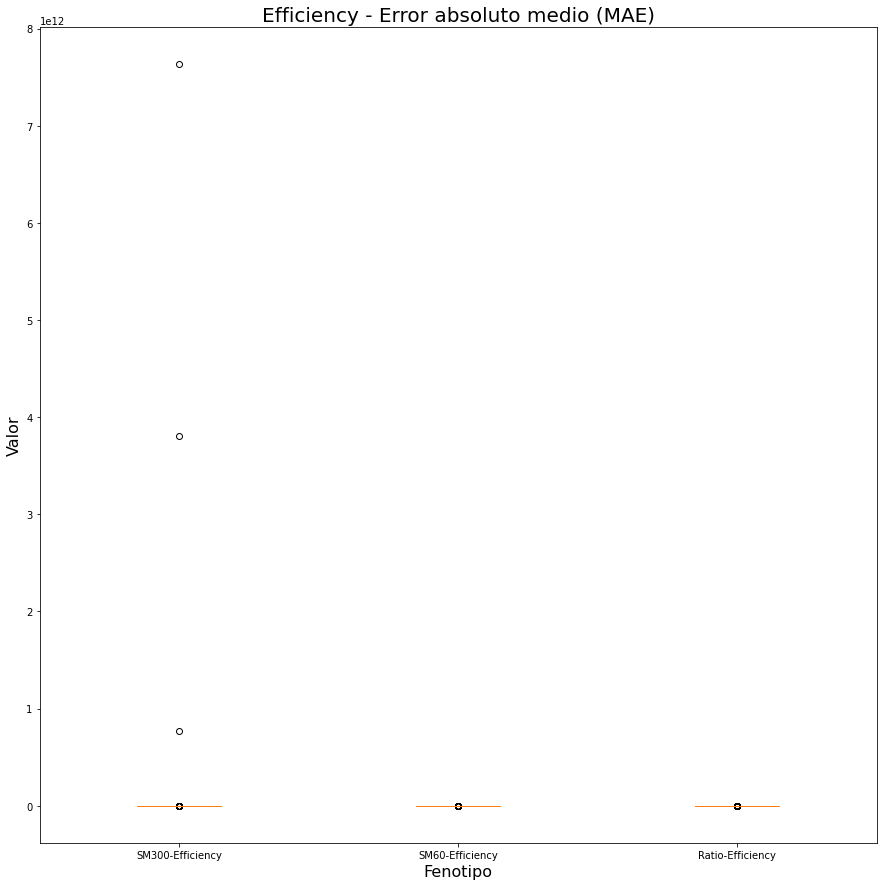

In [17]:
plot_boxplot_metric(data_scoring_metrics, "Efficiency", "MAE")

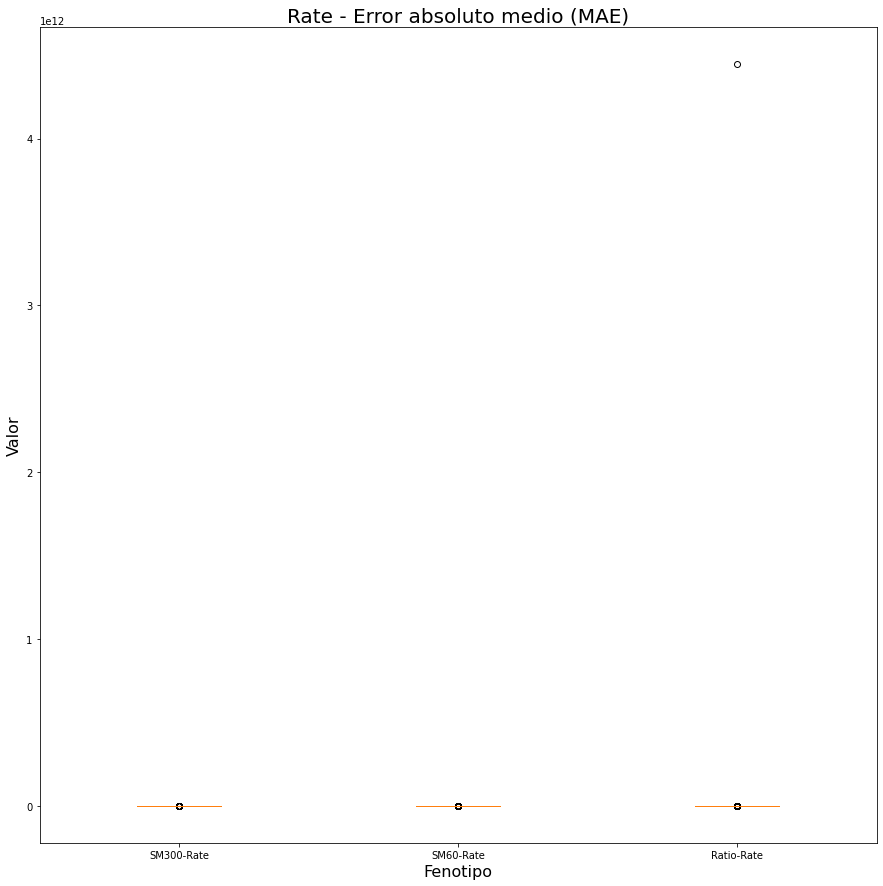

In [18]:
plot_boxplot_metric(data_scoring_metrics, "Rate", "MAE")

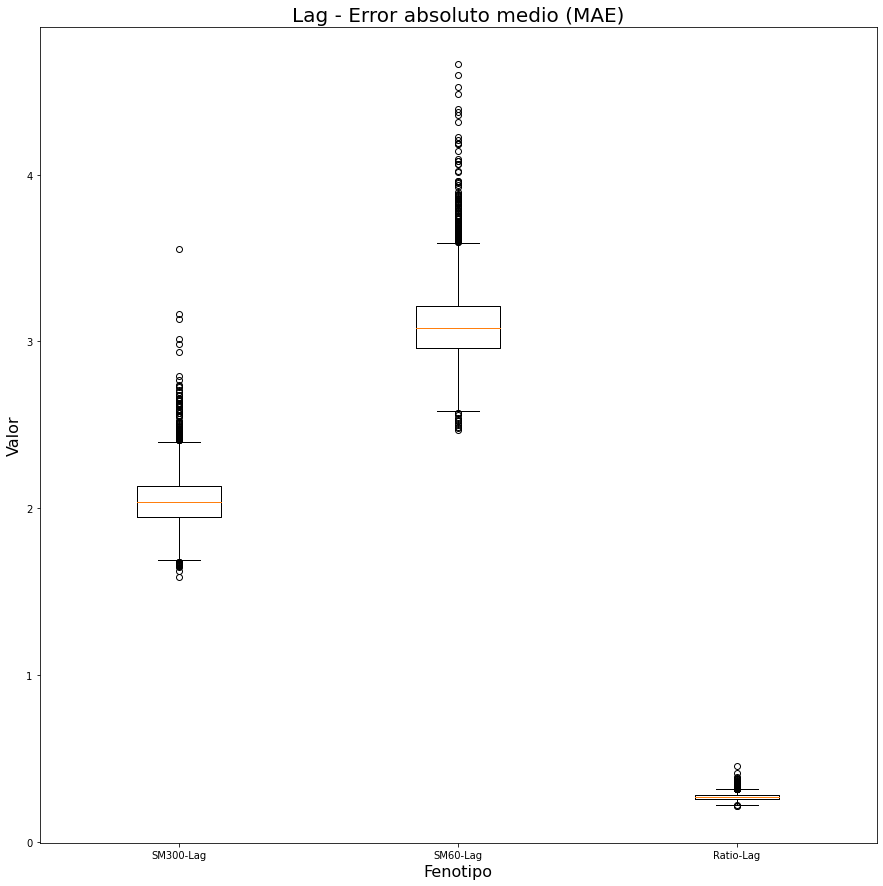

In [19]:
plot_boxplot_metric(data_scoring_metrics, "Lag", "MAE")

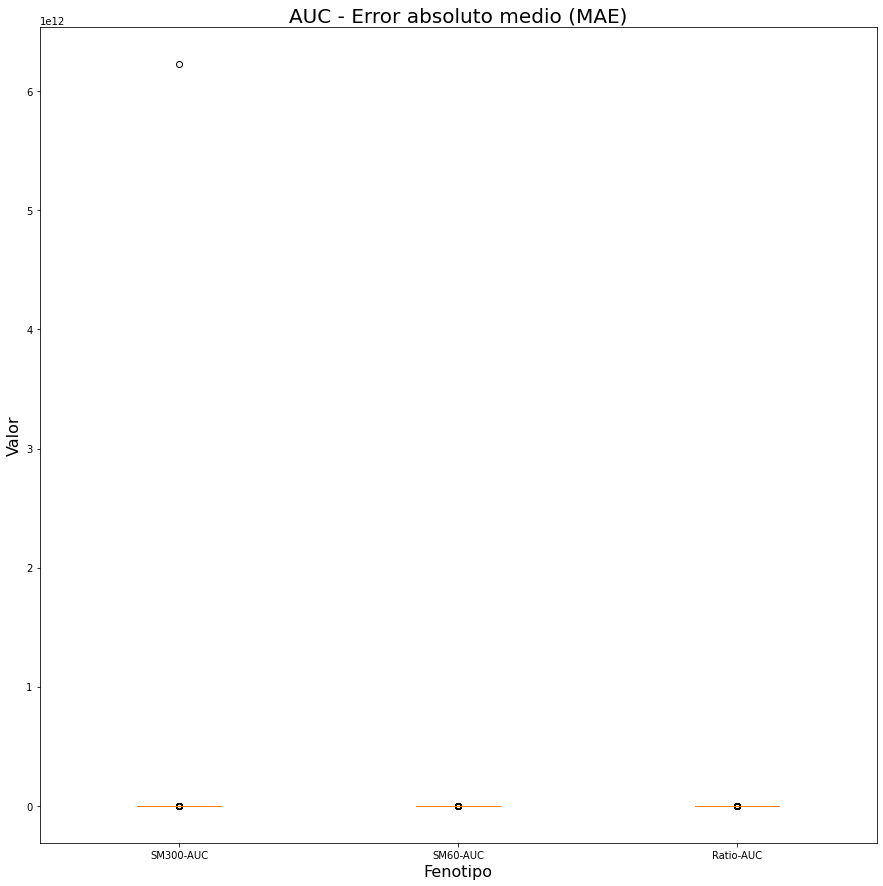

In [20]:
plot_boxplot_metric(data_scoring_metrics, "AUC", "MAE")

In [ ]:
time_df = pd.read_csv(f'/home/khaldrem/code/sc_regmod/dataset/models/filter/{EXP_NUM}/csv/time_metrics_overall.csv')

In [ ]:
time_df.head()

In [ ]:
time_df.describe()

In [ ]:
# time_plot = {}

# for pt in phenotypes:
#     p = pt.split("-")[1]
#     if p == "Efficiency":
#         data_plot[pt] = time_df[f"{pt}_{metric}"]

# # plt.figure(figsize=(2, 10))
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.boxplot(data_plot.values())
# ax.set_title(f'{phenotype} - Error absoluto medio (MAE)', fontsize=20)
# ax.set_xlabel('Fenotipo', fontsize=16)
# ax.set_ylabel('Valor', fontsize=16)
# ax.set_xticklabels(data_plot.keys())



fig, ax = plt.subplots(figsize=(15, 15))
ax.boxplot(time_df["total_per_file"])
ax.set_title(f'Tiempo por archivo', fontsize=20)
ax.set_xlabel('Fenotipo', fontsize=16)
ax.set_ylabel('Valor', fontsize=16)
# ax.set_xticklabels(data_plot.keys())
